In [1]:
import pandas as pd
import glob
# This functions are to plot the graphs
import matplotlib.pyplot as plt
import seaborn as sns
# By here
# This functions are to do mapping
import numpy as np
import json
import folium
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
# By here

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
#### The above code is to set up the font and validate the KOREAN

# This is to test to call the excel files
glob.glob('D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역*.xls')

['D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (1).xls',
 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (10).xls',
 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (11).xls',
 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (12).xls',
 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (13).xls',
 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (14).xls',
 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute 

In [2]:
# This is to call the excel filess
station_files = glob.glob('D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역*.xls')
print(station_files)

['D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (1).xls', 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (10).xls', 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (11).xls', 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (12).xls', 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (13).xls', 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\Downloaded\\지역_위치별(주유소) (14).xls', 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Tec

In [3]:
# This work is to merge all excel files in 'station_files'
# Need to install 'xlrd'
tmp_raw = []
for file_name in station_files:
    # This is to skip the first two rows because they are nothing
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)
print(station_raw)

       지역                    상호                            주소      상표  \
0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
2   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
3   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
4   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
..    ...                   ...                           ...     ...   
29  서울특별시         ㈜새서울석유 새서울주유소               서울 강남구 압구정로 154  현대오일뱅크   
30  서울특별시               SK논현주유소          서울 강남구 논현로 747 (논현동)   SK에너지   
31  서울특별시               갤러리아주유소               서울 강남구 압구정로 426   SK에너지   
32  서울특별시   (주)제이제이네트웍스 제이제이주유소                서울 강남구 언주로 716  현대오일뱅크   
33  서울특별시        (주)만정에너지 삼보주유소         서울 강남구 봉은사로 433 (삼성동)   GS칼텍스   

           전화번호 셀프여부 고급휘발유   휘발유    경유  실내등유  
0   02-487-2030    Y     -  1669  1542     -  
1   02-441-0536    N     -  1

In [4]:
print(station_raw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      441 non-null    object
 1   상호      441 non-null    object
 2   주소      441 non-null    object
 3   상표      441 non-null    object
 4   전화번호    441 non-null    object
 5   셀프여부    441 non-null    object
 6   고급휘발유   441 non-null    object
 7   휘발유     441 non-null    int64 
 8   경유      441 non-null    int64 
 9   실내등유    441 non-null    object
dtypes: int64(2), object(8)
memory usage: 37.9+ KB
None


In [5]:
print(station_raw)

       지역                    상호                            주소      상표  \
0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
2   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
3   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
4   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
..    ...                   ...                           ...     ...   
29  서울특별시         ㈜새서울석유 새서울주유소               서울 강남구 압구정로 154  현대오일뱅크   
30  서울특별시               SK논현주유소          서울 강남구 논현로 747 (논현동)   SK에너지   
31  서울특별시               갤러리아주유소               서울 강남구 압구정로 426   SK에너지   
32  서울특별시   (주)제이제이네트웍스 제이제이주유소                서울 강남구 언주로 716  현대오일뱅크   
33  서울특별시        (주)만정에너지 삼보주유소         서울 강남구 봉은사로 433 (삼성동)   GS칼텍스   

           전화번호 셀프여부 고급휘발유   휘발유    경유  실내등유  
0   02-487-2030    Y     -  1669  1542     -  
1   02-441-0536    N     -  1

In [18]:
# This is to re-organize the data, 'station', having only few items to meet the purpose of this study
station = pd.DataFrame({'Store':station_raw['상호'], 'Address':station_raw['주소'],'Price':station_raw['휘발유'],'Self':station_raw['셀프여부'],'Brand':station_raw['상표']})
print(station.head())

                  Store                       Address  Price Self   Brand
0  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)   1669    Y  현대오일뱅크
1                구천면주유소         서울 강동구 구천면로 357 (암사동)   1684    N  현대오일뱅크
2          대성석유(주)길동주유소              서울 강동구 천호대로 1168   1686    N   GS칼텍스
3        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   1689    Y   GS칼텍스
4        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   1689    Y   GS칼텍스


In [19]:
# This is to make a column for '구'
# For this, we use 'eachAddress.split()' function
# Among 'Address' which is in 'station', we split the words which is distinguishable by space
station['구'] = [eachAddress.split()[1] for eachAddress in station['Address']]
print(station.head())

                  Store                       Address  Price Self   Brand    구
0  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)   1669    Y  현대오일뱅크  강동구
1                구천면주유소         서울 강동구 구천면로 357 (암사동)   1684    N  현대오일뱅크  강동구
2          대성석유(주)길동주유소              서울 강동구 천호대로 1168   1686    N   GS칼텍스  강동구
3        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   1689    Y   GS칼텍스  강동구
4        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   1689    Y   GS칼텍스  강동구


In [8]:
# Since we have a big data set, we need to check a data whether there is a duplicate name or a unwanted subject
station['구'].unique()

array(['강동구', '동작구', '마포구', '서대문구', '성동구', '성북구', '양천구', '영등포구', '용산구',
       '은평구', '종로구', '강북구', '중구', '중랑구', '노원구', '서초구', '송파구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '도봉구', '동대문구', '강남구'], dtype=object)

In [ ]:
# This is how to filter the unwanted subeject
# Let's assume there is '1' in front of '서울특별시' which makes a return as '서울특별시' when we run 'station['구'] = [eachAddress.split()[1] for eachAddress in station['Address']]'
# station[station['구]=='서울특별시']

# AND THEN
# station.loc[station['구]=='서울특별시', '구'] = '성동구'
# station['구'].unique

In [20]:
# This is to rename '구' to 'District'
station.rename(columns={station.columns[5]:'District'}, inplace=True)
print(station.head())

                  Store                       Address  Price Self   Brand  \
0  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)   1669    Y  현대오일뱅크   
1                구천면주유소         서울 강동구 구천면로 357 (암사동)   1684    N  현대오일뱅크   
2          대성석유(주)길동주유소              서울 강동구 천호대로 1168   1686    N   GS칼텍스   
3        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   1689    Y   GS칼텍스   
4        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   1689    Y   GS칼텍스   

  District  
0      강동구  
1      강동구  
2      강동구  
3      강동구  
4      강동구  


In [ ]:
# IF there is a store doesn't report a price and they set as '-'
# station[station['Price']=='-']

# AND THEN, it is to exclude the data without price information
# station = staion[station['Price'] != '-']
# station.head()

In [10]:
# This is to replace the data type in 'Price' to 'float'
station['Price'] = [float(value) for value in station['Price']]

# This is to reset the index because it may contain redundant items 
station.reset_index(inplace=True)
del station['index']
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store     441 non-null    object 
 1   Address   441 non-null    object 
 2   Price     441 non-null    float64
 3   Self      441 non-null    object 
 4   Brand     441 non-null    object 
 5   District  441 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.8+ KB


<AxesSubplot:title={'center':'Price'}, xlabel='Self'>

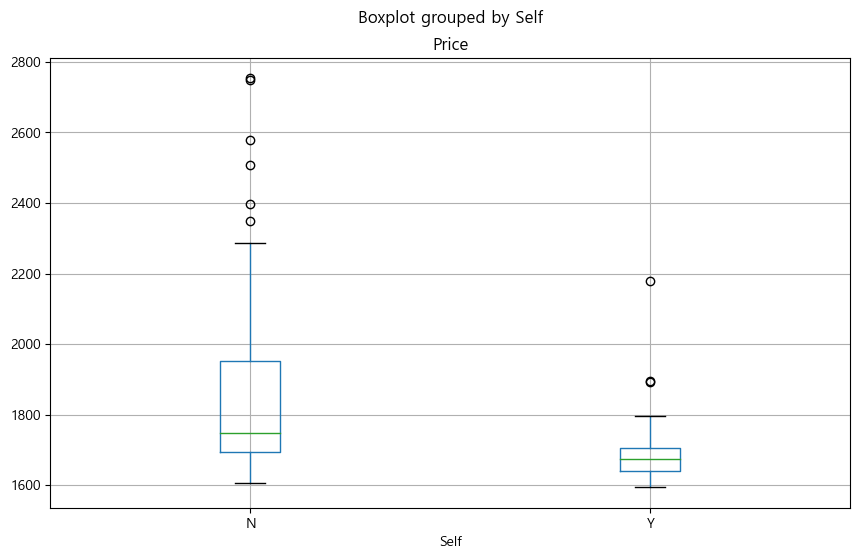

In [11]:
station.boxplot(column='Price', by='Self', figsize=(10,6))

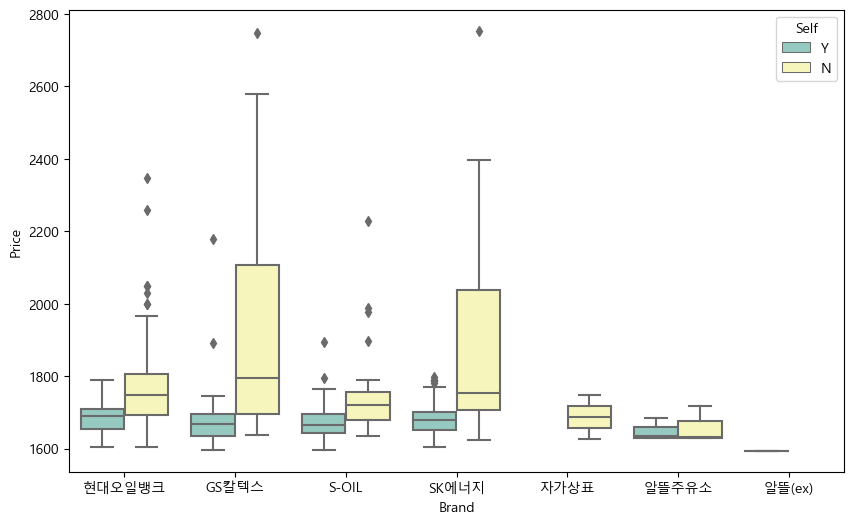

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Price', hue='Self', data=station, palette='Set3')
plt.show()

C:\Users\pig69\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pig69\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pig69\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3544: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pig69\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3544: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pig69\AppData\Roaming\Pyt

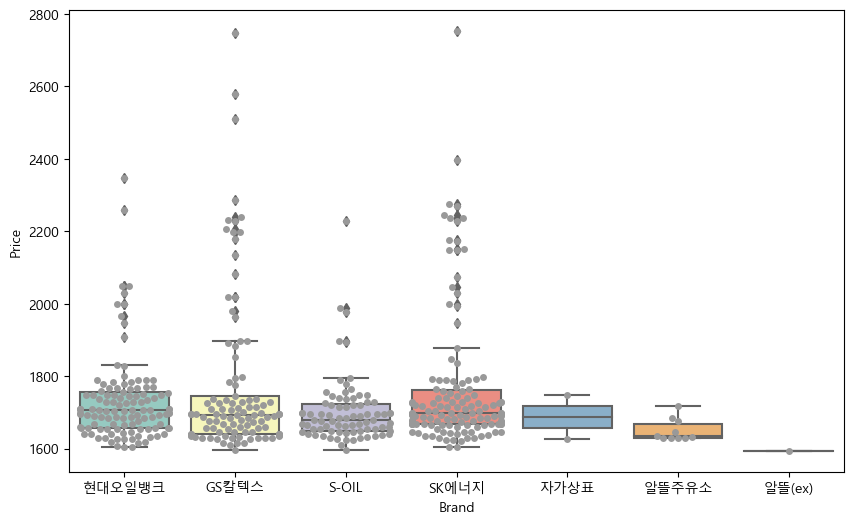

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Price', data=station, palette='Set3')
sns.swarmplot(x='Brand', y='Price', data=station, color='.6')
plt.show()

In [14]:
print(station.sort_values(by='Price', ascending=False))

              Store                 Address   Price Self   Brand District
195           서남주유소            서울 중구 통일로 30  2754.0    N   SK에너지       중구
148           서계주유소   서울 용산구  청파로 367 (청파동)  2749.0    N   GS칼텍스      용산구
440  (주)만정에너지 삼보주유소   서울 강남구 봉은사로 433 (삼성동)  2578.0    N   GS칼텍스      강남구
194           필동주유소    서울 중구 퇴계로 196 (필동2가)  2509.0    N   GS칼텍스       중구
147           한석주유소          서울 용산구 이촌로 164  2398.0    N   SK에너지      용산구
..              ...                     ...     ...  ...     ...      ...
89      형산석유(주)원주유소        서울 양천구 남부순환로 408  1605.0    N  현대오일뱅크      양천구
149          타이거주유소    서울 은평구 수색로 188 (증산동)  1604.0    Y   SK에너지      은평구
86            현대주유소  서울 양천구 남부순환로 372 (신월동)  1595.0    Y   S-OIL      양천구
87      플라트(주)서호주유소        서울 양천구 남부순환로 317  1595.0    Y   GS칼텍스      양천구
223        만남의광장주유소    서울 서초구 양재대로12길 73-71  1594.0    Y  알뜰(ex)      서초구

[441 rows x 6 columns]


In [21]:
gu_data = pd.pivot_table(station, index=['District'], values=['Price'], aggfunc=np.mean)
print(gu_data)

                Price
District             
강남구       1942.000000
강동구       1735.000000
강북구       1649.083333
강서구       1696.212121
관악구       1744.714286
광진구       1683.769231
구로구       1731.700000
금천구       1699.090909
노원구       1699.428571
도봉구       1671.187500
동대문구      1683.166667
동작구       1738.333333
마포구       1699.909091
서대문구      1668.000000
서초구       1737.033333
성동구       1795.187500
성북구       1692.043478
송파구       1684.827586
양천구       1671.500000
영등포구      1730.370370
용산구       2170.333333
은평구       1639.000000
종로구       1946.555556
중구        2053.500000
중랑구       1660.384615


In [16]:
geo_path = 'D:\\OneDrive-Jongki\\OneDrive - Illinois Institute of Technology\\Jongki-study\\05_Manual\\17_Python\\DataScience\\data\\02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [17]:
map = folium.Map(loaction=[37.5502, 126.982], zoom_start=100)
map.choropleth(geo_data = geo_str, data = gu_data['Price'], columns=[gu_data.index, gu_data['Price']], key_on='feature.id')
map